# Laboratorio 4 - Data Science
## Integrantes:
### Mario Guerra - 21008
### Javier Alvarado - 21188

## Análisis Exploratorio

In [9]:
#!pip install numpy pandas matplotlib seaborn tensorflow scikit-learn

  Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata (12 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.1-cp311-cp311-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ---------------------------------------- 0.0/44.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/44.8 MB 3.4 MB/s eta 0:00:14
   -- ------------------------------------- 2.6/44.8 MB 7.6 MB/s eta 0:00:06
   --- ------------------------------------ 4.5/44.8 MB 7.9 MB/s eta 0:00:06
   ------ --------------------------------- 6.8/44.8 MB 9.1 MB/s eta 0:00:05
   ------- -------------------------------- 8.4/44.8 MB 8.7 MB/s eta 0:00:05
   -------- ------------------------------- 9.4/44.8 MB 7.8 MB/s eta 0:00:05
   --------- ------------------------------ 11.0/44.8 MB 7.9 MB/s eta 0:00:05
   ----------- ---------------------------- 12.6/44.8 MB 7.9 

In [2]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
import numpy as np
import seaborn as sns

from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras import ops

In [3]:
def load_data(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                file_path = os.path.join(label_dir, file)
                image = load_img(file_path, color_mode='grayscale')
                image = img_to_array(image)
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)

# Cargar datos de entrenamiento y prueba
train_dir = 'PolyMNIST/MMNIST/train'
test_dir = 'PolyMNIST/MMNIST/test'

train_images, train_labels = load_data(train_dir)
test_images, test_labels = load_data(test_dir)

print(f'Train Images Shape: {train_images.shape}')
print(f'Train Labels Shape: {train_labels.shape}')
print(f'Test Images Shape: {test_images.shape}')
print(f'Test Labels Shape: {test_labels.shape}')


Train Images Shape: (300000, 28, 28, 1)
Train Labels Shape: (300000,)
Test Images Shape: (50000, 28, 28, 1)
Test Labels Shape: (50000,)


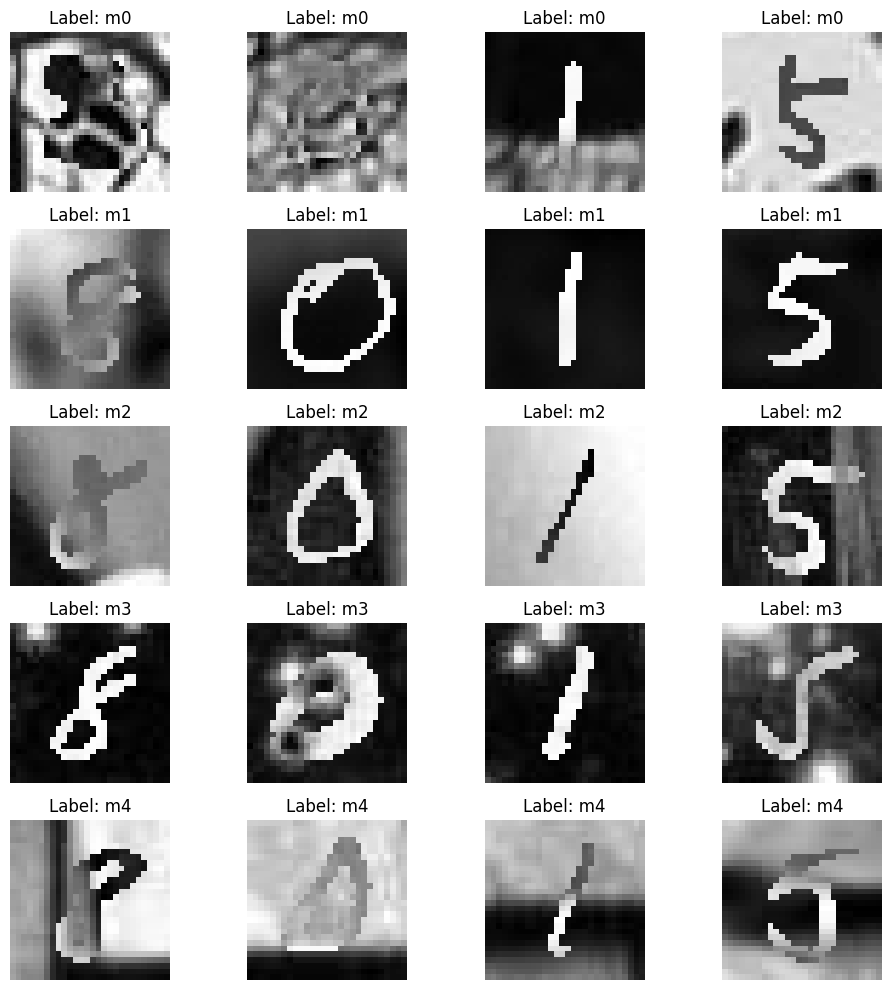

In [4]:
# Convertir etiquetas y datos a un DataFrame para filtrar por cada clase
train_df = pd.DataFrame({'image': list(train_images), 'label': train_labels})

# Mostrar algunas imágenes del dataset de entrenamiento para las etiquetas m1, m2, m3, y m4
plt.figure(figsize=(10, 10))

for i, label in enumerate(['m0', 'm1', 'm2', 'm3', 'm4']):
    # Filtrar imágenes por etiqueta
    filtered_df = train_df[train_df['label'] == label].sample(4, random_state=42)
    
    for j, img in enumerate(filtered_df['image']):
        plt.subplot(5, 4, i * 4 + j + 1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')

plt.tight_layout()
plt.show()

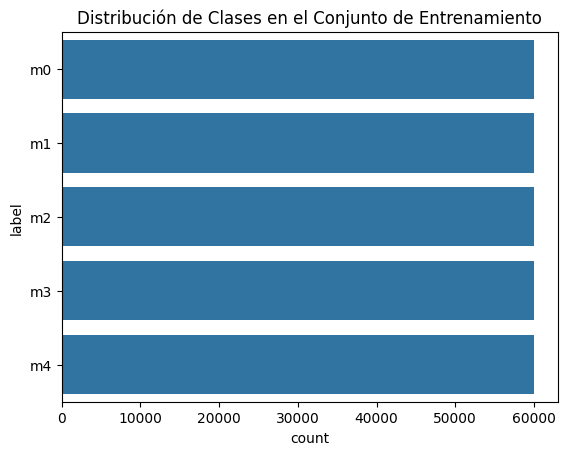

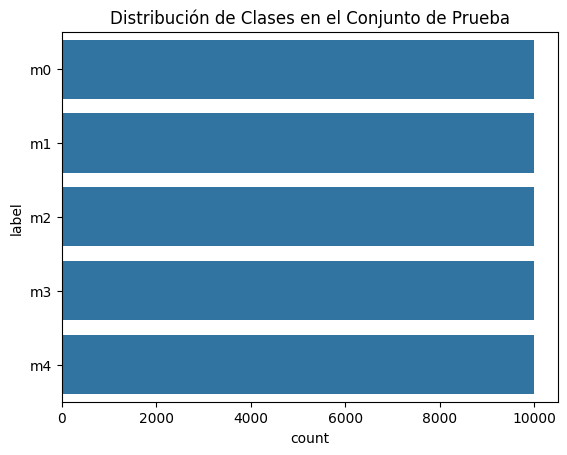

In [5]:
# Convertir etiquetas a DataFrame para facilitar la visualización
train_labels_df = pd.DataFrame(train_labels, columns=['label'])
test_labels_df = pd.DataFrame(test_labels, columns=['label'])

# Visualizar la distribución de las clases
sns.countplot(train_labels_df['label'])
plt.title("Distribución de Clases en el Conjunto de Entrenamiento")
plt.show()

# Visualizar la distribución de las clases
sns.countplot(test_labels_df['label'])
plt.title("Distribución de Clases en el Conjunto de Prueba")
plt.show()


In [6]:
# Verificar la resolución de las imágenes
resolution = train_images[0].shape
print(f'Resolución de las Imágenes: {resolution[0]}x{resolution[1]} píxeles')


Resolución de las Imágenes: 28x28 píxeles


In [7]:
# Contar la cantidad de cada etiqueta
train_class_distribution = train_labels_df['label'].value_counts().to_dict()
test_class_distribution = test_labels_df['label'].value_counts().to_dict()
print(f'Distribución de Clases: {test_class_distribution}')
print(f'Distribución de Clases: {test_class_distribution}')


Distribución de Clases: {'m0': 10000, 'm1': 10000, 'm2': 10000, 'm3': 10000, 'm4': 10000}
Distribución de Clases: {'m0': 10000, 'm1': 10000, 'm2': 10000, 'm3': 10000, 'm4': 10000}


## Creación de modelos de Deep Learning (CNN)

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Normalizar imágenes
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Codificar etiquetas a números
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Convertir etiquetas a one-hot encoding
train_labels_one_hot = to_categorical(train_labels_encoded)
test_labels_one_hot = to_categorical(test_labels_encoded)


# Modelo 1: CNN Básico

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_basic_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(train_images.shape[1], train_images.shape[2], 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

basic_cnn = create_basic_cnn()


c:\Users\mague\Downloads\Lab4DataScience\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Modelo 2: CNN Avanzado

In [10]:
from tensorflow.keras.layers import Dropout

def create_advanced_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(train_images.shape[1], train_images.shape[2], 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

advanced_cnn = create_advanced_cnn()

In [13]:
# Entrenamiento del modelo básico
history_basic = basic_cnn.fit(train_images, train_labels_one_hot, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluación del modelo básico
test_loss_basic, test_accuracy_basic = basic_cnn.evaluate(test_images, test_labels_one_hot, verbose=1)
print(f'Accuracy del Modelo Básico: {test_accuracy_basic:.4f}')

# Entrenamiento del modelo avanzado
history_advanced = advanced_cnn.fit(train_images, train_labels_one_hot, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluación del modelo avanzado
test_loss_advanced, test_accuracy_advanced = advanced_cnn.evaluate(test_images, test_labels_one_hot, verbose=1)
print(f'Accuracy del Modelo Avanzado: {test_accuracy_advanced:.4f}')


Epoch 1/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 83s 11ms/step - accuracy: 0.7940 - loss: 0.4827 - val_accuracy: 0.0000e+00 - val_loss: 18.1775
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 76s 10ms/step - accuracy: 0.9550 - loss: 0.1246 - val_accuracy: 0.0000e+00 - val_loss: 26.3480
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - accuracy: 0.9692 - loss: 0.0854 - val_accuracy: 0.0000e+00 - val_loss: 29.7231
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 138s 10ms/step - accuracy: 0.9757 - loss: 0.0693 - val_accuracy: 0.0000e+00 - val_loss: 32.5498
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/step - accuracy: 0.9794 - loss: 0.0574 - val_accuracy: 0.0000e+00 - val_loss: 37.9984
Epoch 6/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 81s 11ms/step - accuracy: 0.9825 - loss: 0.0487 - val_accuracy: 0.0000e+00 - val_loss: 39.9473
Epoch 7/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 82s 11ms/step - accuracy: 0.9852 - loss: 0.0419 - val_accuracy: 0.0000e+00 - val_loss: 31.8395
Epoch 8/10
7500/7500 ━━━━━━━━━━━━━━━━━━━

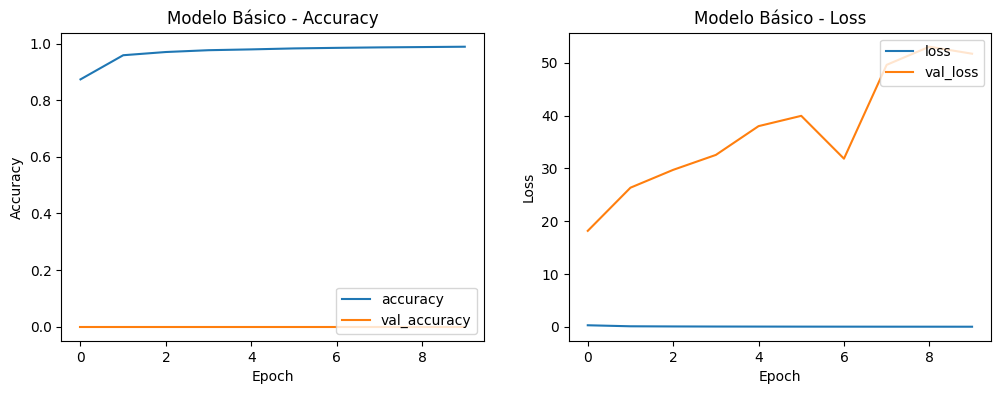

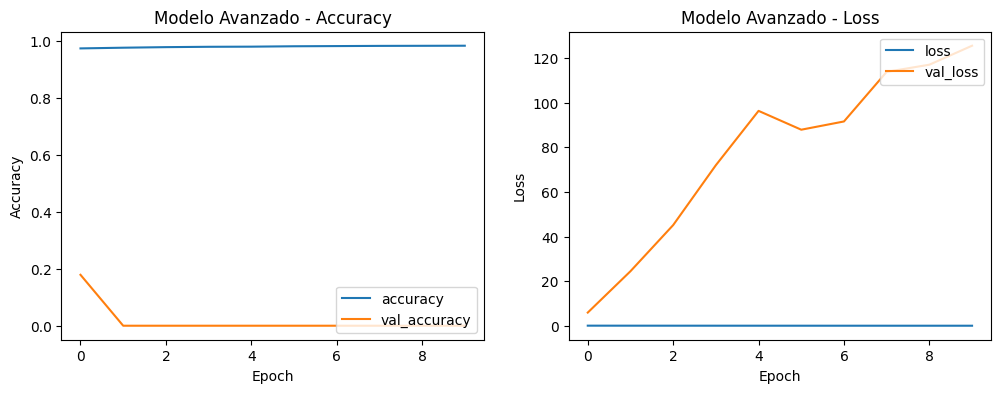

In [14]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    plt.show()

plot_history(history_basic, 'Modelo Básico')
plot_history(history_advanced, 'Modelo Avanzado')


# Creación de un modelo de una red neuronal simple

c:\Users\mague\Downloads\Lab4DataScience\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.6454 - loss: 0.7962 - val_accuracy: 0.0000e+00 - val_loss: 24.3250
Epoch 2/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7536 - loss: 0.5583 - val_accuracy: 0.0000e+00 - val_loss: 33.9160
Epoch 3/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7870 - loss: 0.4890 - val_accuracy: 0.0000e+00 - val_loss: 43.6889
Epoch 4/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8026 - loss: 0.4538 - val_accuracy: 0.0000e+00 - val_loss: 49.8937
Epoch 5/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8153 - loss: 0.4311 - val_accuracy: 0.0000e+00 - val_loss: 49.6868
Epoch 6/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8248 - loss: 0.4102 - val_accuracy: 0.0000e+00 - val_loss: 52.6397
Epoch 7/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8293 - loss: 0.3992 - val_accuracy: 0.0000e+00 - val_loss: 52.5845
Epoch 8/10
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 15s 2m

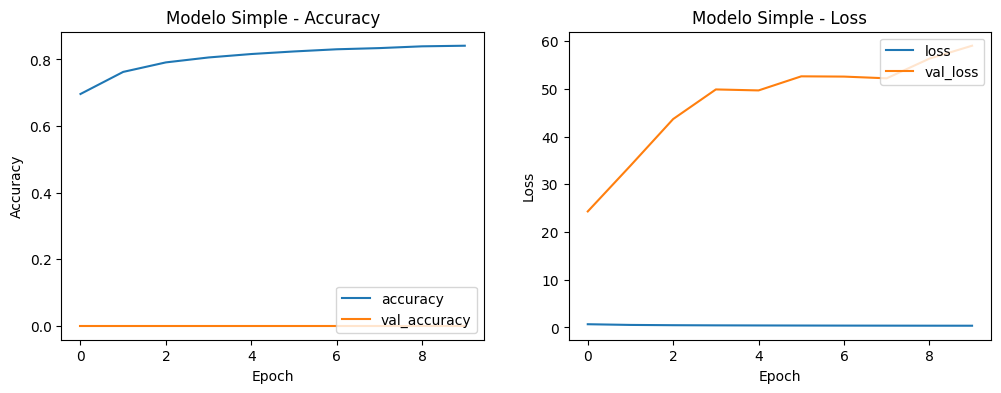

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_simple_nn():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Crear y entrenar el modelo de red neuronal simple
simple_nn = create_simple_nn()

# Entrenar el modelo simple
history_simple = simple_nn.fit(train_images, train_labels_one_hot, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluar el modelo simple
test_loss_simple, test_accuracy_simple = simple_nn.evaluate(test_images, test_labels_one_hot, verbose=1)
print(f'Accuracy del Modelo Simple: {test_accuracy_simple:.4f}')

# Graficar los resultados
plot_history(history_simple, 'Modelo Simple')


# Implementación de algoritmo KNN para clasificación de imágenes.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Aplanar las imágenes para usarlas con KNN (de 28x28 a 784 características)
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)  # Puedes ajustar el número de vecinos (k)

# Entrenar el modelo KNN
knn_model.fit(train_images_flat, train_labels_encoded)

# Evaluar el modelo KNN
knn_predictions = knn_model.predict(test_images_flat)
knn_accuracy = accuracy_score(test_labels_encoded, knn_predictions)
print(f'Accuracy del Modelo KNN: {knn_accuracy:.4f}')


KeyboardInterrupt: 

# Transformaciones a los datos (Image Augmentation)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear el generador de datos con augmentación
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)

# Re-entrenar el modelo avanzado con augmentación
augmented_train_gen = datagen.flow(train_images, train_labels_one_hot, batch_size=32)

# Re-entrenar el modelo avanzado
history_advanced_augmented = advanced_cnn.fit(augmented_train_gen, 
                                              epochs=10, 
                                              validation_data=(test_images, test_labels_one_hot),
                                              verbose=1)

# Evaluar el modelo avanzado con augmentación
test_loss_advanced_augmented, test_accuracy_advanced_augmented = advanced_cnn.evaluate(test_images, test_labels_one_hot, verbose=1)
print(f'Accuracy del Modelo Avanzado con Augmentación: {test_accuracy_advanced_augmented:.4f}')

Epoch 1/10
   1/9375 ━━━━━━━━━━━━━━━━━━━━ 7:57:53 3s/step - accuracy: 0.1562 - loss: 1.6102

c:\Users\mague\Downloads\Lab4DataScience\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9375/9375 ━━━━━━━━━━━━━━━━━━━━ 99s 10ms/step - accuracy: 0.6944 - loss: 0.7159 - val_accuracy: 0.9149 - val_loss: 0.2217
Epoch 2/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 90s 10ms/step - accuracy: 0.8999 - loss: 0.2698 - val_accuracy: 0.9333 - val_loss: 0.1811
Epoch 3/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 86s 9ms/step - accuracy: 0.9209 - loss: 0.2147 - val_accuracy: 0.9398 - val_loss: 0.1528
Epoch 4/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 92s 10ms/step - accuracy: 0.9343 - loss: 0.1807 - val_accuracy: 0.9237 - val_loss: 0.2091
Epoch 5/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 90s 10ms/step - accuracy: 0.9398 - loss: 0.1651 - val_accuracy: 0.9571 - val_loss: 0.1209
Epoch 6/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 123s 13ms/step - accuracy: 0.9459 - loss: 0.1522 - val_accuracy: 0.9562 - val_loss: 0.1196
Epoch 7/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 216s 23ms/step - accuracy: 0.9482 - loss: 0.1432 - val_accuracy: 0.9512 - val_loss: 0.1328
Epoch 8/10
9375/9375 ━━━━━━━━━━━━━━━━━━━━ 102s 11ms/step - accuracy: 0.9511 - loss: 0.

NameError: name 'plot_history' is not defined

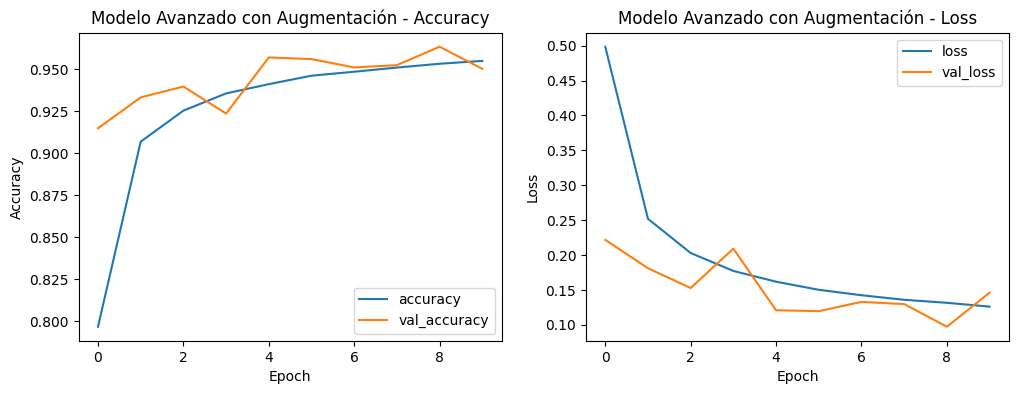

In [16]:
# Graficar los resultados del modelo avanzado con augmentación
plot_history(history_advanced_augmented, 'Modelo Avanzado con Augmentación')